<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Metabolic-Network-Experiments" data-toc-modified-id="Metabolic-Network-Experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Metabolic Network Experiments</a></span></li><li><span><a href="#Simple-Futile-Cycle" data-toc-modified-id="Simple-Futile-Cycle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Futile Cycle</a></span><ul class="toc-item"><li><span><a href="#Index-Theorem" data-toc-modified-id="Index-Theorem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Index Theorem</a></span></li><li><span><a href="#Edge-localization-Triangle-repeat" data-toc-modified-id="Edge-localization-Triangle-repeat-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Edge localization Triangle repeat</a></span></li><li><span><a href="#Edge-states-from-Tang-et-al" data-toc-modified-id="Edge-states-from-Tang-et-al-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Edge states from Tang et al</a></span></li></ul></li><li><span><a href="#Caclulating-Fluxes-and-Currents-using-ODEs" data-toc-modified-id="Caclulating-Fluxes-and-Currents-using-ODEs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Caclulating Fluxes and Currents using ODEs</a></span><ul class="toc-item"><li><span><a href="#Triangle-Network" data-toc-modified-id="Triangle-Network-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Triangle Network</a></span><ul class="toc-item"><li><span><a href="#Additional-Graphs-and-Visualizations" data-toc-modified-id="Additional-Graphs-and-Visualizations-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Additional Graphs and Visualizations</a></span></li></ul></li><li><span><a href="#Edge-Currents-from-Tang-et-al" data-toc-modified-id="Edge-Currents-from-Tang-et-al-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Edge Currents from Tang et al</a></span><ul class="toc-item"><li><span><a href="#Basic-Functions" data-toc-modified-id="Basic-Functions-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Basic Functions</a></span></li></ul></li></ul></li><li><span><a href="#Gilespie-Simulation" data-toc-modified-id="Gilespie-Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gilespie Simulation</a></span><ul class="toc-item"><li><span><a href="#Code" data-toc-modified-id="Code-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><span><a href="#Edge-Current-Parameters" data-toc-modified-id="Edge-Current-Parameters-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Edge Current Parameters</a></span></li><li><span><a href="#No-edge-Current-Parameters" data-toc-modified-id="No-edge-Current-Parameters-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>No edge Current Parameters</a></span></li></ul></li></ul></li><li><span><a href="#Spectrum-and-Topology-Plot-for-SI" data-toc-modified-id="Spectrum-and-Topology-Plot-for-SI-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spectrum and Topology Plot for SI</a></span></li></ul></div>

# Metabolic Network Experiments

This is to test if we can get topological states directly from stoichiometric matrices.

In [2]:
# Import some libraries


import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import linalg as LA

%matplotlib inline

#Fix Random Seed
np.random.seed(0)

#Fix Seaborn Defaults ala Jason

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks',
rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})


# Simple Futile Cycle


Conside a futile cycle on the form:

$$
A \rightleftarrows  B \\
B \rightleftarrows  C \\
C \rightleftarrows  D \\
D \rightleftarrows  A \\
$$

We will assume all forward rates are $f$ and all backwards rates are $b$ for simplicity. Let us now look at stoichiometric matrix

$$
S= \left[ {\begin{array}{cccc}
   -1 &  0 & 0 & 1 \\
    1 &  -1 & 0 & 0 \\
    0 &  1  & -1 & 0 \\
    0 &  0 & 1 &  -1
  \end{array} }  \right]
$$
  

In [3]:
S=np.array([[-1,0,0,1],[1,-1,0,0],[0,1,-1,0], [0,0,1,-1]])
U,D,VT = np.linalg.svd(S)
print (U)
print (D)
print (VT)


[[-0.5 -0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]]
[2.00000000e+00 1.41421356e+00 1.41421356e+00 1.11022302e-16]
[[ 5.00000000e-01 -5.00000000e-01  5.00000000e-01 -5.00000000e-01]
 [ 7.07106781e-01 -3.92523115e-17 -7.07106781e-01 -1.17756934e-16]
 [-1.96261557e-17  7.07106781e-01  5.88784672e-17 -7.07106781e-01]
 [ 5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01]]


## Index Theorem

We know that we have the index theorem
$$
\# \text{rxn } - \# \text{ metabolites} =\text{dim(feasible space) } - \# \text{ conserved metabolite pools}
$$

For this example, we have that the conserved metabolite pool corresponds to the $0$ signular value of $S$. The left singular vector in this case is just $l=[0.5,0.5,0.5,0.5]$  (last column of $U$) and the right is the same (last row of $V^T$). This implies that the conserved pool as expected in $A+B+C+D$ and all fluxes are same $J_1=J_2=J_3=J_4$. As expected, the index theorem holds.

## Edge localization Triangle repeat

Let us do the simple triangle case where we understand everything first. We have simple triangle driven reaction with drives

$$
\theta_\alpha = e^{-{\Delta \mu_\alpha \over k_B T}} -1.
$$


We know that the stochiometric matrix  in Fourier space takes the form
$$
S(k)=\left[ {\begin{array}{ccc}
1-e^{ik} & -1 & e^{ik} \\
0 & 1 &-1\\
  \end{array} }  \right]
$$
We would like to focus on matrix that just has positive (negative) fluxes
$$
S^+_{i \alpha}(k) = S_{i \alpha} \theta_\alpha
$$
Explicitly we have that
$$
S^+(k)=\left[ {\begin{array}{ccc}
\theta_1 (1-e^{ik}) & - \theta_2  & \theta_3 e^{ik} \\
0 & \theta_2 & -\theta_3\\
  \end{array} }  \right]
$$



0.0
0.1191843252093463


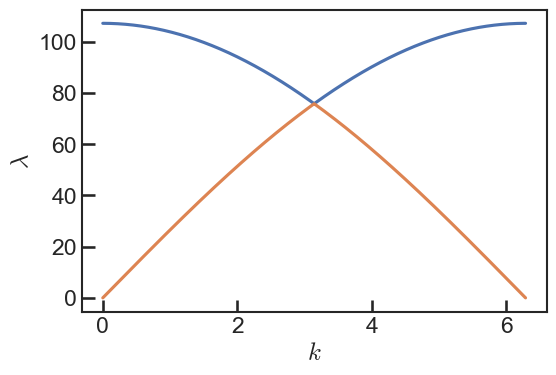

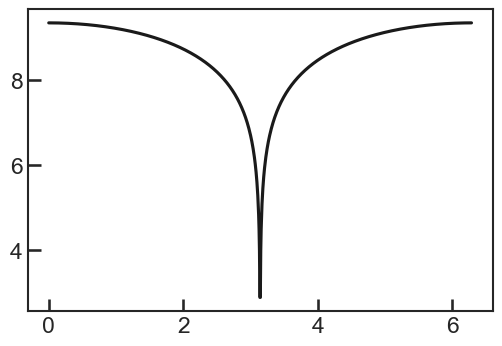

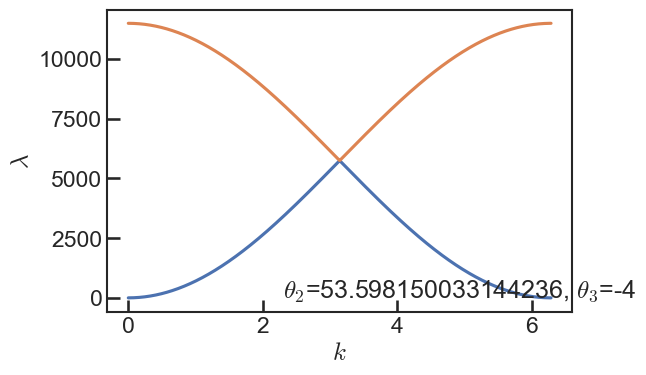

In [4]:
# Note we use S for the generalized stochiometric matrix in our code.
a=0
mu_1=0
mu_2=-4
mu_3=-4
theta_1=np.exp(-1*mu_1)-1
theta_2=np.exp(-1*mu_2)-1
theta_3=np.exp(-1*mu_3)-1
print(theta_1)
k_array=np.linspace(0, 2*np.pi, 1000, endpoint=True)
lam_array=[]
eig_array=[]
for k in k_array:
    S=np.array([[theta_1*(1-np.exp(1j*k)), -1*theta_2, theta_3*np.exp(1j*k)],[0, theta_2, -1*theta_3]])
    u, lam, vh = np.linalg.svd(S)
    lam_array=np.append(lam_array, lam)
    
    H=S.dot(np.matrix.getH(S))
    v,w = LA.eig(H)
    eig_array=np.append(eig_array, np.sort(np.real(v)))

    
lam_1= lam_array[0::2]
lam_2= lam_array[1::2]
eig_1= eig_array[0::2]
eig_2= eig_array[1::2]

print(min(lam_1-lam_2))

fig = plt.figure()
ax = plt.axes()

plt.plot(k_array, lam_1)
plt.plot(k_array, lam_2)
plt.xlabel('$k$')
plt.ylabel('$\lambda$')
plt.show()


fig = plt.figure()
ax = plt.axes()

plt.plot(k_array, np.log(abs(eig_1-eig_2)), '-k')
plt.show()


fig = plt.figure()
ax = plt.axes()

plt.plot(k_array, eig_1)
plt.plot(k_array, eig_2)
plt.xlabel('$k$')
plt.ylabel('$\lambda$')

title=r'$\theta_2$='+str(theta_2)+r', $\theta_3$='+str(mu_3)
plt.text(2.3, 3.5, title)

plt.show()


The key point we see from playing around with parameters that the gap closes at $k=0$ precisely when $\theta_2=\theta_3=0$ when $\theta_1$ is anything. Or alternatively when $\theta_1=0$ and $\theta_2=\theta_3$ at $k=\pm \pi$

##  Edge states from Tang et al

Now we consider the polymer model (with reversible reactions) from Tang. This should support topological edge currents. 

We know that we have a figure of the form shown here   <img src="edge-states-tang.jpg" width=400 height=400 />

This gives us a stochiometric matrix in momentum space of form

We know that the stochiometric matrix  in Fourier space takes the form
$$
S(k)=\left[ {\begin{array}{cccccccc}
-1 & 1  & 0  & 0  & e^{ik_x \over 2}    & 0                    & -e^{ik_y \over 2}   & 0 \\
0  & -1 & 1  & 0  & 0                   &  -e^{ik_x \over 2}   & e^{-{ik_y \over 2}} & 0 \\
0  & 0  & -1 & 1  & 0                   & e^{-{ik_x \over 2}} & 0                   & -e^{-{ik_y \over 2}}\\
1  & 0  & 0  & -1 & -e^{-{ik_x \over 2}}& 0                    & 0                   &  e^{ik_y \over 2} \\
  \end{array} }  \right]
$$
and the corresponding stochiometric matrix for positive matrices
$$
S^-(k)=\left[ {\begin{array}{cccccccc}
-\theta_1 & \theta_2  & 0  & 0  & \theta_5 e^{ik_x \over 2}    & 0                    & -\theta_7e^{ik_y \over 2}   & 0 \\
0  & -\theta_2 & \theta_3  & 0  & 0                   &  -\theta_6 e^{ik_x \over 2}   & \theta_7 e^{-{ik_y \over 2}} & 0 \\
0  & 0  & -\theta_3 & \theta_4  & 0                   & \theta_6 e^{-{ik_x \over 2}} & 0                   & -\theta_8 e^{-{ik_y \over 2}}\\
\theta_1  & 0  & 0  & -\theta_4 & -\theta_5 e^{-{ik_x \over 2}}& 0                    & 0                   &  \theta_8 e^{ik_y \over 2} \\
  \end{array} }  \right]
$$

We can also create the corresponding Hermitian matrix $H(k)=S^+(k)S^{+*}(k)$. Explicitly, this is given
by
$$
H(k)=\left[ {\begin{array}{cccc}
\theta_1^2+\theta_2^2+\theta_3^2+\theta_4^2 & -\theta_2^2-\theta_7^2e^{ik_y} & 0 &-\theta_1^2-\theta_5^2e^{ik_x}\\
 -\theta_2^2-\theta_7^2e^{-ik_y}& \theta_2^2+\theta_3^2+\theta_5^2+\theta_7^2 & -\theta_3^2-\theta_6^2e^{ik_x} &
 0 \\
 0 &-\theta_3^2-\theta_6^2e^{-ik_x}&\theta_3^2+\theta_4^2+\theta_6^2+\theta_8^2 &-\theta_4^2-\theta_8^2e^{-ik_y}\\
 -\theta_1^2-\theta_5^2e^{-ik_x}&0&-\theta_4^2-\theta_8^2e^{ik_y}& \theta_1^2+\theta_4^2+\theta_5^2+\theta_8^2\\
\end{array} }  \right]
$$

We consider the simple case where we have that $\theta_1=\theta_2=\theta_3=\theta_4=a$ and $\theta_5=\theta_6=\theta_7=\theta_8=b$. This corresponds to how driven the internal external reactions are. For this choice there is always degenerate eigenvalue. Furthermore, we see that the gap closes exactly when $a= b$. These likely correspond to two topologically distinct phases. 

In [5]:
### Note we use S for the generalized stochiometric matrix in our code.

#a=1
#b=a+0.02
#c=np.exp(3*np.log(a+1)-3*np.log(b+1))
#theta=[a,a,a,a,b,b,b,b]

mu_1=-2*np.log(3)
mu_2=-2*np.log(3)


theta1=np.exp(-mu_1)
theta2=np.exp(-mu_2)
theta = [theta1,theta1, theta1, theta1,theta2, theta2,theta2,theta2]

n=3
m=4
n_x=50
kx=np.linspace(-1*np.pi, np.pi, n_x, endpoint=True)
ky=np.linspace(-1*np.pi, np.pi, n_x, endpoint=True)


kx_mesh,ky_mesh =np.meshgrid(kx, ky)

lam_array=[]
eig_array=[]



#Create tensor S[i, alpha, k_x, k_y] with for indices so we can easily calculate singular values
S=np.zeros((4,8,n_x,n_x), dtype=complex)


#Create first row of matrix
S[0,0,:,:]=-1*theta[0]
S[0,1,:,:]=theta[1]
S[0,2,:,:]=0
S[0,3,:,:]=0
S[0,4,:,:]=theta[4]*np.exp(1.j*kx_mesh/2)
S[0,5,:,:]=0
S[0,6,:,:]=-1*theta[6]*np.exp(1.j*ky_mesh/2)
S[0,7,:,:]=0

#Create second row of matrix
S[1,0,:,:]=0
S[1,1,:,:]=-1*theta[1]
S[1,2,:,:]=theta[2]
S[1,3,:,:]=0
S[1,4,:,:]=0
S[1,5,:,:]=-1*theta[5]*np.exp(1.j*kx_mesh/2)
S[1,6,:,:]=theta[6]*np.exp(-1.j*ky_mesh/2)
S[1,7,:,:]=0

#Create third row of matrix
S[2,0,:,:]=0
S[2,1,:,:]=0
S[2,2,:,:]=-1*theta[2]
S[2,3,:,:]=1*theta[3]
S[2,4,:,:]=0
S[2,5,:,:]=theta[5]*np.exp(-1.j*kx_mesh/2)
S[2,6,:,:]=0
S[2,7,:,:]=-1*theta[7]*np.exp(-1.j*ky_mesh/2)

#Create forth row of matrix
S[3,0,:,:]=theta[0]
S[3,1,:,:]=0
S[3,2,:,:]=0
S[3,3,:,:]=-1*theta[3]
S[3,4,:,:]=-1*theta[4]*np.exp(-1.j*kx_mesh/2)
S[3,5,:,:]=0
S[3,6,:,:]=0
S[3,7,:,:]=theta[7]*np.exp(1.j*ky_mesh/2)



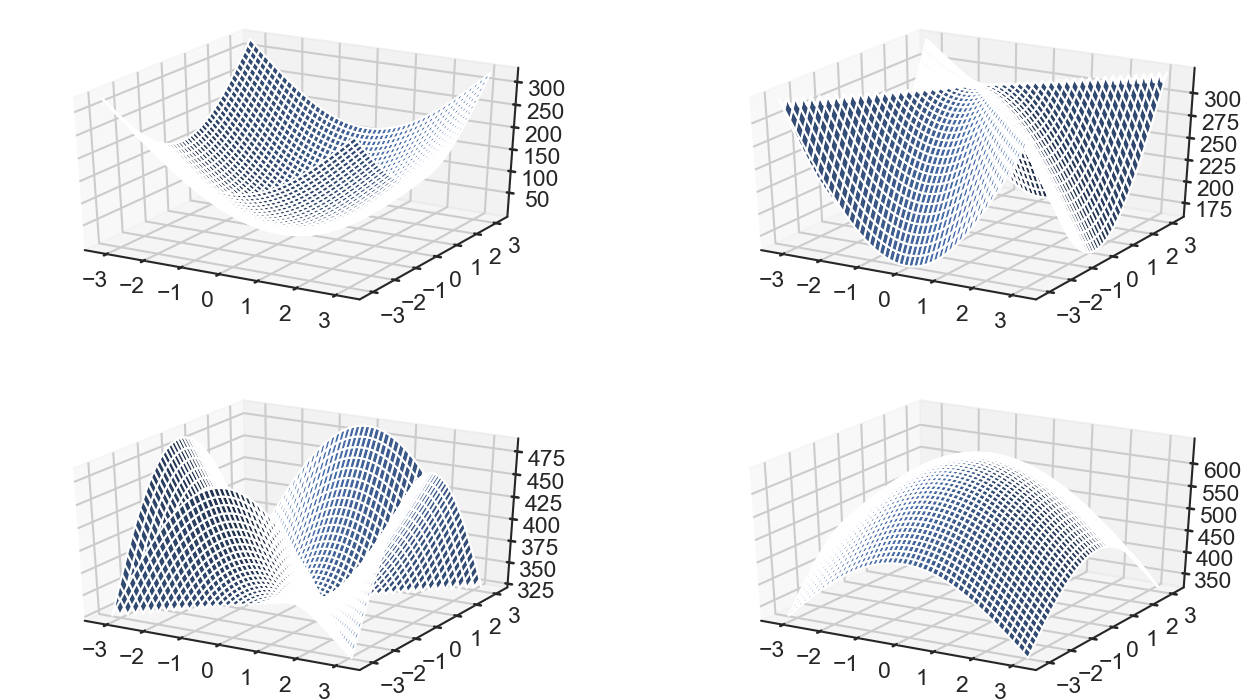

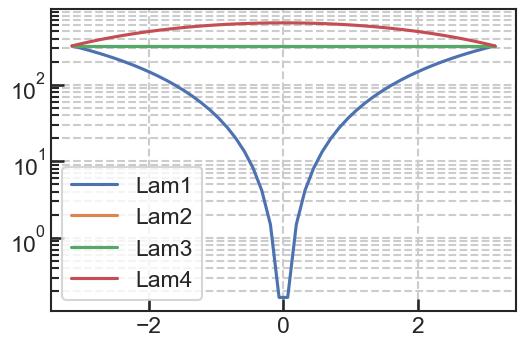

In [6]:
lam_matrix=np.zeros((4,n_x,n_x))
eig_matrix=np.zeros((4,n_x,n_x))

for m in np.arange(n_x):
    for n in np.arange(n_x):
        S_matrix=S[:,:, n, m]
        u, lam, vh = np.linalg.svd(S_matrix)
        lam_matrix[:,m,n]=np.sort(lam)
    
        H=S_matrix.dot(np.matrix.getH(S_matrix))
        v,w = LA.eig(H)
        eig_matrix[:,m,n]=np.real(np.sort(v))
        

fig=plt.figure(figsize =(16, 9))
 
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, eig_matrix[0,:,:])
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, eig_matrix[1,:,:])
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, eig_matrix[2,:,:])
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, eig_matrix[3,:,:])
# show plo
# show plot
plt.show()

fig=plt.figure()

plt.plot(kx, np.diag(eig_matrix[0,:,:]), label = "Lam1")
plt.plot(kx, np.diag(eig_matrix[1,:,:]), label = "Lam2")
plt.plot(kx, np.diag(eig_matrix[2,:,:],), label = "Lam3")
plt.plot(kx, np.diag(eig_matrix[3,:,:]), label = "Lam4")
plt.yscale('log')
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()


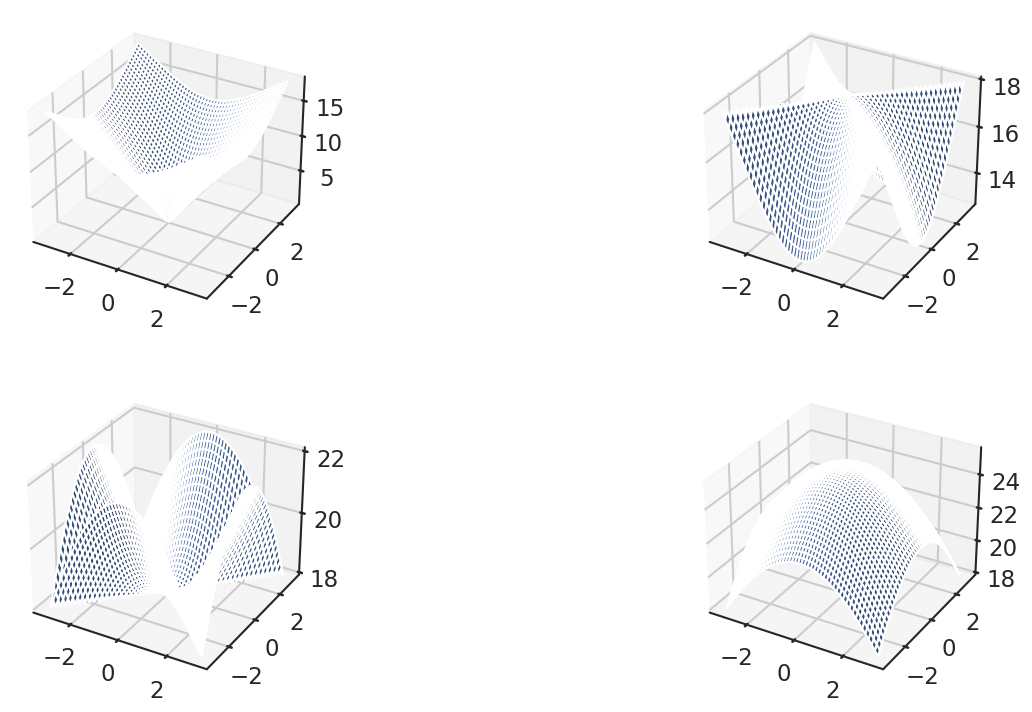

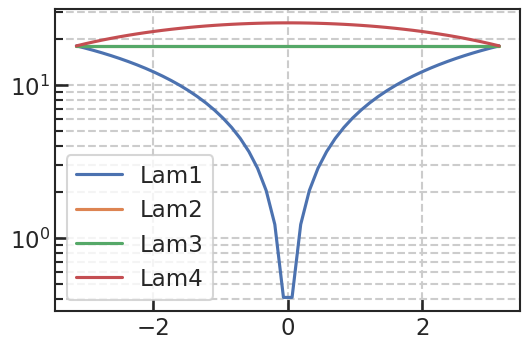

In [6]:
        
fig=plt.figure(figsize =(16, 9))
 
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, lam_matrix[0,:,:])
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, lam_matrix[1,:,:])
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, lam_matrix[2,:,:])
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(kx_mesh, ky_mesh, lam_matrix[3,:,:])
# show plo
# show plot
plt.show()

fig=plt.figure()

plt.plot(kx, np.diag(lam_matrix[0,:,:]), label = "Lam1")
plt.plot(kx, np.diag(lam_matrix[1,:,:]), label = "Lam2")
plt.plot(kx, np.diag(lam_matrix[2,:,:],), label = "Lam3")
plt.plot(kx, np.diag(lam_matrix[3,:,:]), label = "Lam4")
plt.yscale('log')
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

        

# Caclulating Fluxes and Currents using ODEs


Now we will explicitly simulate the systems above to check that there are edge modes and edge currents as expected. 


## Triangle Network


Let us revisit the triangle network. This is just the same differential equation as before. We will include single rate that just renormalizes time for all things to make things easier. The differential equations are

Denote the number of triangles by $N$. We 
Let us label the $2N$ species $x_0,x_1,\ldots, x_{2N}$ (Add picture) and we have corresponding $3N$ fluxes
$J_0, \ldots, J_{3N-1}$. We will assume all reactions are diffusion limited and hence measure time in terms of this single rate $r$. For this reason, we can de-dimensionalize time $\tau=tr$ to get

We therefore have for $j=0 \ldots N$:
$$
{dx_0 \over d\tau} = -J_0+J_2\\
{dx_{2N} \over d \tau}= J_{3N-3}-J_{3N-2}\\
{dx_{2j} \over d \tau} = -J_{3j} +J_{3j-3}+J_{3j+2}-J_{3j-2} \\
{dx_{2j+1} \over d \tau}= -J_{3j+2}+J_{3j+1}
$$

We also have that for $j=0,\ldots N$ that
$$
J_{3j} = (\theta_1 +1)x_{2j}-x_{2j+2}\\
J_{3j+1}=(\theta_2+1)x_{2j+2} -x_{2j+1}\\
J_{3j+2}=(\theta_3+1)x_{2j+1}-x_{2j}
$$

We can of course recast these equations in the form of stochiometric matrix as above to get $j=0,\ldots,N$


In [7]:
# Let us now construct relevant matrices and differential equations

#First create stochiometric matrix
N=10
S=np.zeros((2*N+1,3*N))

index=np.arange(N)

S[2*index+1,3*index+2]=-1
S[2*index,3*index+2]=1

S[2*index+1,3*index+1]=1
S[2*index+2,3*index+1]=-1

S[2*index,3*index]=-1
S[2*index+2,3*index]=1

# \Delta \mu_0 + \Delta \mu^{drive} = kbT ln(k^-/k^+) (with kbT = 1)

Dmu0_1 = np.log(1.0/1.0)
Dmu0_2 = np.log(2.0/1.0)

print(Dmu0_2)

# Right edge mode
Dmu0_3_right = np.log(1.0/1.0)

# Left edge mode
Dmu0_3_left = np.log(0.25/1.0)

print(Dmu0_3_right, Dmu0_3_left)

0.6931471805599453
0.0 -1.3862943611198906


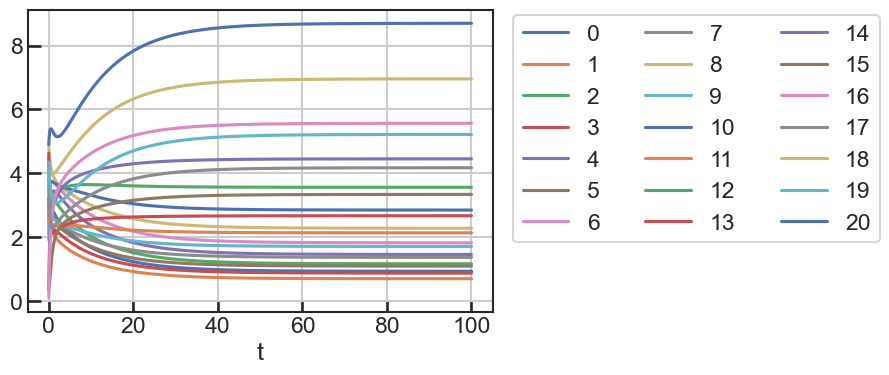

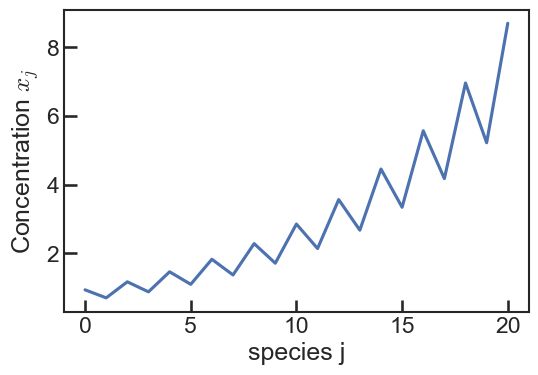

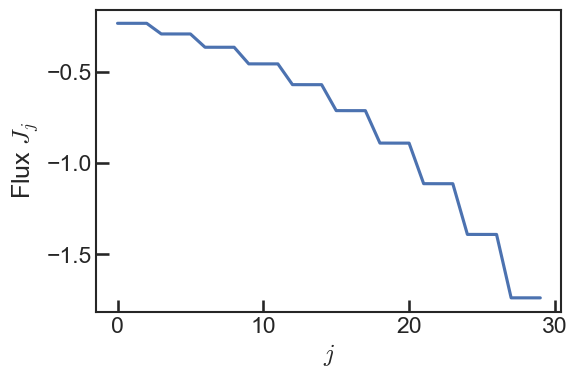

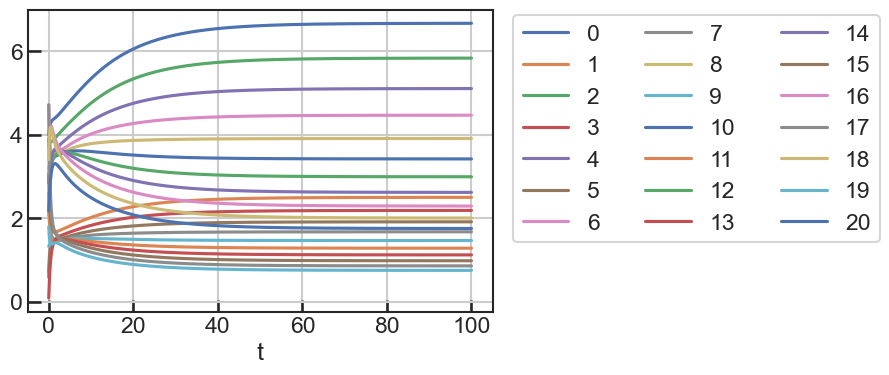

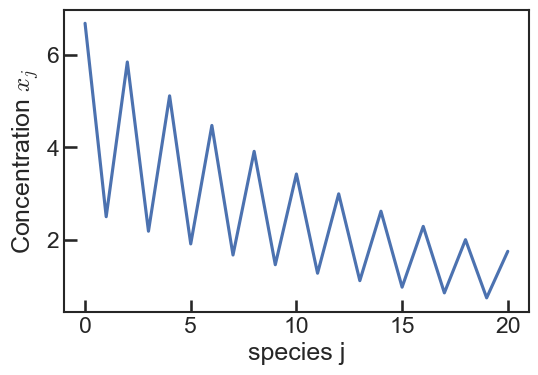

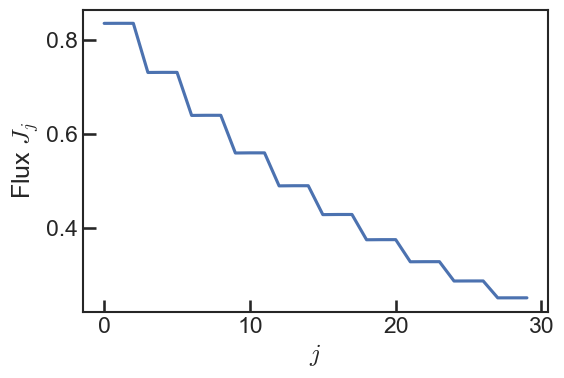

In [8]:

def find_fluxes(x, S, Dmu0_1, Dmu0_2, Dmu0_3):
   
    N= np.int_((S.shape[0]-1)/2)
    
    fluxes=np.zeros(3*N)
    fluxes[0::3]= x[2*np.arange(N)]-np.exp(Dmu0_1)*x[2*np.arange(N)+2]
    fluxes[1::3]= x[2*np.arange(N)+2]-np.exp(Dmu0_2)*x[2*np.arange(N)+1]
    fluxes[2::3]= x[2*np.arange(N)+1]-np.exp(Dmu0_3)*x[2*np.arange(N)]
    
    return fluxes

def dx_dt(x, t, S, Dmu0_1, Dmu0_2, Dmu0_3):
    #x is an array of size 
    N=np.int_((S.shape[0]-1)/2)
    
    nu=find_fluxes(x, S, Dmu0_1, Dmu0_2, Dmu0_3)
    
    return S.dot(nu)

# Solve for concentrations and fluxes for right edge mode

t = np.linspace(0, 100, 1001)
x0=np.random.uniform(0,5,2*N+1)

from scipy.integrate import odeint
sol = odeint(dx_dt, x0, t, args=(S, Dmu0_1, Dmu0_2, Dmu0_3_right))



#Calculate final concentrations and fluxes

x_ss_right=sol[-1,:]

flux_right=find_fluxes(x_ss_right, S, Dmu0_1, Dmu0_2, Dmu0_3_right)


#Make plot of concentrations
labels = np.arange(2*N+1)    
labels = list(map(str,labels))

# plt.rcParams['image.cmap'] = 'guppy'
for j in np.arange(2*N+1):
    plt.plot(t, sol[:,j], label=labels[j])

plt.legend(bbox_to_anchor=(1.02, 1.02), ncol=3)
plt.xlabel('t')

plt.grid()

plt.show()

plt.plot(np.arange(2*N+1), x_ss_right)
plt.xlabel('species j')
plt.ylabel('Concentration $x_j$')


plt.show()


plt.plot(np.arange(3*N), flux_right)
plt.xlabel('$j$')
plt.ylabel('Flux '+r'$J_j$')


plt.show()

####################################

# Solve for concentrations and fluxes for left edge mode

t = np.linspace(0, 100, 1001)
x0=np.random.uniform(0,5,2*N+1)

from scipy.integrate import odeint
sol = odeint(dx_dt, x0, t, args=(S, Dmu0_1, Dmu0_2, Dmu0_3_left))



#Calculate final concentrations and fluxes

x_ss_left=sol[-1,:]

flux_left=find_fluxes(x_ss_left, S, Dmu0_1, Dmu0_2, Dmu0_3_left)


#Make plot of concentrations
labels = np.arange(2*N+1)    
labels = list(map(str,labels))

# plt.rcParams['image.cmap'] = 'guppy'
for j in np.arange(2*N+1):
    plt.plot(t, sol[:,j], label=labels[j])

plt.legend(bbox_to_anchor=(1.02, 1.02), ncol=3)
plt.xlabel('t')

plt.grid()

plt.show()

plt.plot(np.arange(2*N+1), x_ss_left)
plt.xlabel('species j')
plt.ylabel('Concentration $x_j$')


plt.show()


plt.plot(np.arange(3*N), flux_left)
plt.xlabel('$j$')
plt.ylabel('Flux '+r'$J_j$')


plt.show()

### Additional Graphs and Visualizations
We can now visualize some of other quantities and we will use for the paper. 
For both the left and right localized mode, we show:

- the driving chemical potentials, $\Delta \mu^0 + \Delta\mu^{drive} = k_BT \ln k^-/k^+$
- the net fluxes, $J = J^+-J^-$,
- the thermodynamic drives, $\theta= J^+/J^- -1$

0.0 0.6931471805599453 0.0


/Users/pmehta/Anaconda/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pmehta/Anaconda/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in double_scalars
/Users/pmehta/Anaconda/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))


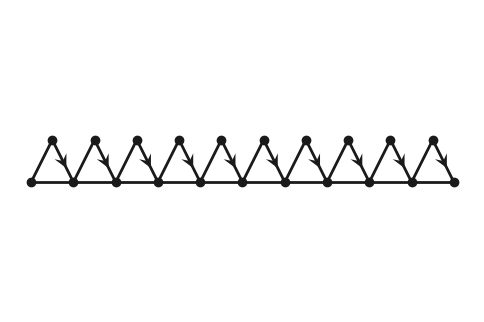

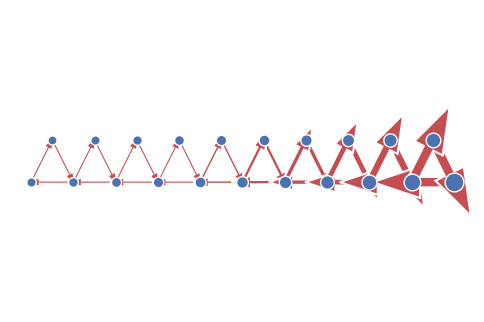

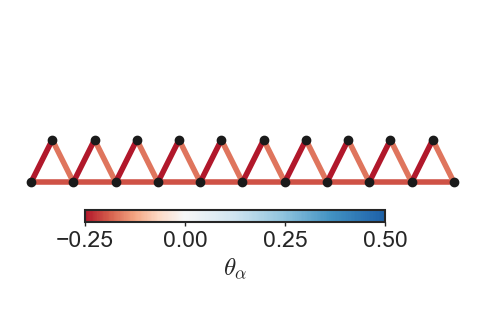

-0.25001872058204344 -0.16666745427513363
0.0 0.6931471805599453 -1.3862943611198906


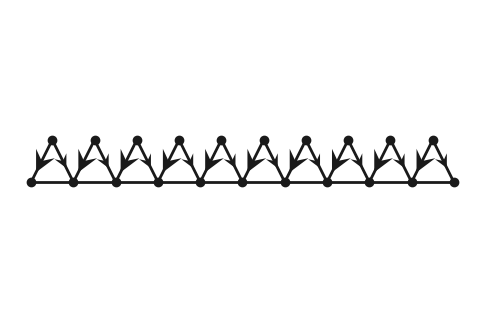

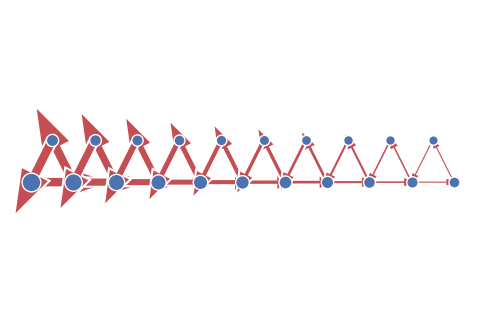

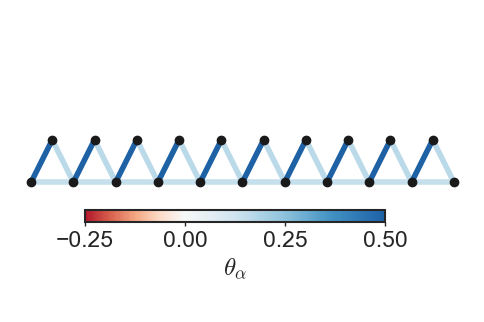

0.14277274250405725 0.5000917735559527


In [9]:

def plot_net_fluxes(flux, x_ss, N, fn=""):

    originX = originY = 0

    node_size=15

    for j in np.arange(N+1):
        PtsX = 10*j
        PtsY = 0
        plt.plot(PtsX, PtsY, 'o', color='b', ms=0.5*node_size*x_ss[j*2]/np.max(x_ss)+6.0, mec='w')



    for j in np.arange(N):
        PtsX = 5+10*j
        PtsY = 10
        plt.plot(PtsX, PtsY, 'o', color='b', ms=0.5*node_size*x_ss[j*2+1]/np.max(x_ss)+6.0, mec='w')


    plt.ylim(-10,10)
    plt.xlim(-20,N*10+20)
    plt.axis('equal')


    width=np.abs(flux/np.max(np.abs(flux)))
    max_width=2.5
    min_width=0.75

    for j in np.arange(3*N):
        if np.mod(j,3)==0:
            if flux[j]>0:
                plt.arrow(x=10*(j//3), y=0, dx=8, dy=0, facecolor='r', width=max(min_width, max_width*width[j]))
            else:    
                plt.arrow(x=10*((j//3)+1), y=0, dx=-8, dy=0, facecolor='r', width=max(min_width, max_width*width[j]))
        if np.mod(j,3)==1:    
            if flux[j]>0:
                plt.arrow(x=10*((j//3)+1), y=0, dx=-4, dy=8, facecolor='r', width=max(min_width, max_width*width[j]))
            else:
                plt.arrow(x=(10*(j//3)+5), y=10, dx=4, dy=-8, facecolor='r', width=max(min_width, max_width*width[j]))
        if np.mod(j,3)==2:    
            if flux[j]>0:
                plt.arrow(x=(10*(j//3)+5), y=10, dx=-4, dy=-8, facecolor='r', width=max(min_width, max_width*width[j]))
            else:
                plt.arrow(x=10*(j//3), y=0, dx=4, dy=8, facecolor='r', width=max(min_width, max_width*width[j]))

    #plt.arrow(x=0, y=0, dx=8, dy=0, fa
    plt.axis('off')
    plt.savefig('{}.pdf'.format(fn), dpi=300, bbox_inches='tight')
    plt.show()


def plot_Dmu0(Dmu0_1, Dmu0_2, Dmu0_3, N, fn=""):
    
    
    originX = originY = 0

    fig, ax = plt.subplots(1,1)
    

    ax.set_ylim(-10,10)
    ax.set_xlim(-20,N*10+20)
    ax.axis('equal')


    width = 2

    for j in np.arange(3*N):
        if np.mod(j,3)==0:
            plt.plot([10*(j//3),10*(j//3)+10] , [0,0], "-", linewidth=width, color='k')
        if np.mod(j,3)==1:    
            plt.plot([10*((j//3)+1), 10*((j//3)+1)-5], [0,10],  "-", linewidth=width, color='k')
        if np.mod(j,3)==2:    
            plt.plot([(10*(j//3)+5),(10*(j//3)+5)-5], [10,0], "-",  linewidth=width, color='k')
            
            
    
    node_size=6

    for j in np.arange(N+1):
        PtsX = 10*j
        PtsY = 0
        plt.plot(PtsX, PtsY, 'o', color='k', ms=node_size)


    for j in np.arange(N):
        PtsX = 5+10*j
        PtsY = 10
        plt.plot(PtsX, PtsY, 'o', color='k', ms=node_size)
     
    
    size = 125.0*max(0.1, np.abs(Dmu0_1/Dmu0_2))

    width = 0.00001*size
    length = 0.025*size
    spacing = 0.015*size

    hl = 1.0/width*length
    hal = 0.6*hl
    hw = 1.0*hl
        

    X = []
    Y = []
    U = []
    V = []
    for j in np.arange(0, 3*N, 3):
        posi = np.array([10*(j//3), 0])
        posj = np.array([10*((j//3)+1), 0])
        
        vhat = posj - posi
        vhat = vhat/LA.norm(vhat)
        center = (posi+posj)/2

        if Dmu0_1<0:
            pos = center - (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = length*vhat
            U.append(d[0])
            V.append(d[1])
        elif Dmu0_1>0:    
            pos = center + (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = -length*vhat
            U.append(d[0])
            V.append(d[1])

    ax.quiver(X, Y, U, V, units='xy', angles='xy', scale=1.0, headwidth=hw, headaxislength=hal, headlength=hl, width=width)
        
        
        
    size = 125.0

    width = 0.00001*size
    length = 0.025*size
    spacing = 0.015*size

    hl = 1.0/width*length
    hal = 0.6*hl
    hw = 1.0*hl
        

    X = []
    Y = []
    U = []
    V = []
    for j in np.arange(1, 3*N, 3):
        posi = np.array([10*((j//3)+1), 0])
        posj = np.array([10*(j//3)+5, 10])
        
        vhat = posj - posi
        vhat = vhat/LA.norm(vhat)
        center = (posi+posj)/2

        if Dmu0_2<0:
            pos = center - (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = length*vhat
            U.append(d[0])
            V.append(d[1])
        elif Dmu0_2>0:    
            pos = center + (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = -length*vhat
            U.append(d[0])
            V.append(d[1])

    ax.quiver(X, Y, U, V, units='xy', angles='xy', scale=1.0, headwidth=hw, headaxislength=hal, headlength=hl, width=width)
        
        
    size = 125*np.abs(Dmu0_3/Dmu0_2)**(2/3)

    width = 0.00001*size
    length = 0.025*size
    spacing = 0.015*size

    hl = 1.0/width*length
    hal = 0.6*hl
    hw = 1.0*hl
        

    X = []
    Y = []
    U = []
    V = []
    for j in np.arange(2, 3*N, 3):
        posi = np.array([10*(j//3)+5, 10])
        posj = np.array([10*(j//3), 0])
        
        vhat = posj - posi
        vhat = vhat/LA.norm(vhat)
        center = (posi+posj)/2

        if Dmu0_3<0:
            pos = center - (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = length*vhat
            U.append(d[0])
            V.append(d[1])
        elif Dmu0_3>0: 
            pos = center + (length - spacing)*vhat
            X.append(pos[0])
            Y.append(pos[1])
            d = -length*vhat
            U.append(d[0])
            V.append(d[1])

    ax.quiver(X, Y, U, V, units='xy', angles='xy', scale=1.0, headwidth=hw, headaxislength=hal, headlength=hl, width=width)
     

        
        

    ax.axis('off')
    plt.savefig('{}.pdf'.format(fn), dpi=300, bbox_inches='tight')

    
    plt.show()

    
    
def plot_theta(theta_dict, N, vmin=None, vmax=None, fn=""):
    
    
    
    # the limiting values of the colormap (centered on zero)
    
    if vmin is None:
        vmin = -1.0
    if vmax is None:
        vmax = np.abs(theta_dict).max()
    
    # the normalization function 
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    
    cutoff = 0.1
    cmap_low = plt.cm.RdBu(np.linspace(cutoff, 0.5, int(-256*vmin/(vmax-vmin))))
    cmap_up = plt.cm.RdBu(np.linspace(0.5, 1.01-cutoff, int(256*vmax/(vmax-vmin))))
    all_colors = np.vstack((cmap_low, cmap_up))
    cmap = mpl.colors.LinearSegmentedColormap.from_list('double_cmap',
        all_colors)

    # the object that maps scalar values to colors
    smap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    # convert the value v to a color
    #color = smap.to_rgba(v)

    
    originX = originY = 0

    fig, ax = plt.subplots(1,1)
    

    ax.set_ylim(-10,10)
    ax.set_xlim(-20,N*10+20)
    ax.axis('equal')


    width = 4

    for j in np.arange(3*N):
        if np.mod(j,3)==0:
            plt.plot([10*(j//3),10*(j//3)+10] , [0,0], "-", linewidth=width, color=smap.to_rgba(theta_dict[j]))
        if np.mod(j,3)==1:    
            plt.plot([10*((j//3)+1), 10*((j//3)+1)-5], [0,10],  "-", linewidth=width, color=smap.to_rgba(theta_dict[j]))
        if np.mod(j,3)==2:    
            plt.plot([(10*(j//3)+5),(10*(j//3)+5)-5], [10,0], "-",  linewidth=width, color=smap.to_rgba(theta_dict[j]))
            
            
    
    node_size=6

    for j in np.arange(N+1):
        PtsX = 10*j
        PtsY = 0
        plt.plot(PtsX, PtsY, 'o', color='k', ms=node_size)


    for j in np.arange(N):
        PtsX = 5+10*j
        PtsY = 10
        plt.plot(PtsX, PtsY, 'o', color='k', ms=node_size)

    #plt.arrow(x=0, y=0, dx=8, dy=0, fa
    ax.axis('off')
    #plt.savefig('triangle-fluxes-theta2=1theta3=-0.9.pdf')
    
    # to plot the color bar make an axis and add it to the figure
    pad = 0.25
    cax = fig.add_axes([pad, 0.35, 1-2*pad, 0.03])

    # orientation can be horizontal or vertical
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
    cax.tick_params(which='major', direction='out', length=3.0, width=1.0)
    cbar.set_label(r"$\theta_\alpha$")
    cbar.set_ticks([-0.25, 0.0, 0.25, 0.5])
    
    plt.savefig('{}.pdf'.format(fn), dpi=300, bbox_inches='tight')

    
    plt.show()
    
def calc_theta(x, N, Dmu0_1, Dmu0_2, Dmu0_3):
   
    theta=np.zeros(3*N)
    theta[0::3] = x[0:-1:2]/(np.exp(Dmu0_1)*x[2::2])-1
    theta[1::3] = x[2::2]/(np.exp(Dmu0_2)*x[1::2])-1
    theta[2::3] = x[1::2]/(np.exp(Dmu0_3)*x[0:-1:2])-1
   
    return theta   


print(Dmu0_1, Dmu0_2, Dmu0_3_right)

plot_Dmu0(Dmu0_1, Dmu0_2, Dmu0_3_right, N, fn="triangle_Dmu_right")
    
plot_net_fluxes(flux_right, x_ss_right, N, fn="triangle_flux_right")


theta_dict=calc_theta(x_ss_right, N, Dmu0_1, Dmu0_2, Dmu0_3_right)
plot_theta(theta_dict, N, vmin=-0.25, vmax=0.5, fn="triangle_theta_right")

print(theta_dict.min(), theta_dict.max())

print(Dmu0_1, Dmu0_2, Dmu0_3_left)


plot_Dmu0(Dmu0_1, Dmu0_2, Dmu0_3_left, N, fn="triangle_Dmu_left")

plot_net_fluxes(flux_left, x_ss_left, N, fn="triangle_flux_left")

theta_dict=calc_theta(x_ss_left, N, Dmu0_1, Dmu0_2, Dmu0_3_left)
plot_theta(theta_dict, N, vmin=-0.25, vmax=0.5, fn="triangle_theta_left")

print(theta_dict.min(), theta_dict.max())

In [ ]:
print(theta_dict)

[-0.11067672 -0.03622156  0.75006585 -0.10967939 -0.03642735  0.74847877
 -0.10891716 -0.03654673  0.74719962 -0.10843402 -0.03657798  0.74630946
 -0.10824528 -0.03652724  0.74584789 -0.10833846 -0.03640736  0.7458131
 -0.10867649 -0.03623632  0.74616525 -0.10920308 -0.03603514  0.74683283
 -0.10984964 -0.03582564  0.74772182 -0.11054309 -0.03562829  0.74872648]


## Edge Currents from Tang et al

We will now simulate ODE's corresponding to the network depicted in the Tang et al. This is an intertwined square lattice. We know that we have a figure of the form shown We know that we have a figure of the form shown here ![edge-states-tang.jpg](attachment:edge-states-tang.jpg). Actually this does not work well so we have moved to end of the notebook. Instead, we will use Gillespie algorithm.


### Basic Functions
Below we have some functions we need in what follows.



In [10]:
#Begin by making stochiometric matrix. Consider a lattice that is n x m in size

theta_array=np.ones(8)

def make_stochiomentric_matrix_2D(n,m):

    # The number of chemical species is 
    n_x=4*n*m
    #The number of vertical fluxes is 
    n_fv=2*m*(2*n-1)
    #The number of horizontal fluxes is
    n_fh=2*n*(2*m-1)


    S=np.zeros((n_x, n_fh+n_fv))


    #Nodes are numbered for n=2, m=3
    #0  1  2  3  4  5
    #6  7  8  9  10 11
    #12 13 14 15 16 17
    #18 19 20 21 22 23


    #vertical fluxes count like for n=2,m=3
    #0 3 .... 15
    #1 4  ....16
    #2 5 ...  17 

    #Horizontal fluxes counted like for m=3
    #0   1  2  3  4  
    #5   6  7  8  9 
    #10 11 12 13  15

    #Create Stoichiometric Matrix ala Tang


    for j in np.arange(n_x):

        #First add horizontal fluxes

        #Make sure you are not right most column
        if np.mod(j+1,2*m)!=0:
            horizontal_flux_number=(j//(2*m))*(2*m-1)+np.mod(j,2*m)
            #print(horizontal_flux_number)
            #Match orientations to match picture in Fig 1c in Tang
            if np.mod(j//(2*m),2)==0:
                S[j,horizontal_flux_number]=1
                S[j+1,horizontal_flux_number]=-1
            else:
                S[j,horizontal_flux_number]=-1
                S[j+1,horizontal_flux_number]=1

       #Now add vertical fluxes
       #Make sure you are not in bottom column

        if np.mod((j//(2*m))+1,2*n)!=0:
            vertical_flux_number = np.mod(j,2*m)*(2*n-1)+j//(2*m)+n_fh
            #Match orientations to match picture in Fig 1c in Tang
            if np.mod(np.mod(j,2*m),2)==0:
                 S[j,vertical_flux_number]=-1
                 S[j+2*m,vertical_flux_number]=1
            else:
                S[j,vertical_flux_number]=1
                S[j+2*m,vertical_flux_number]=-1

    return S


def find_chemical_potentials(n,m, mu_array):
    #Returns a list of mu associated with each reaction
    # The number of chemical species is 
    n_x=4*n*m
    #The number of vertical fluxes is 
    n_fv=2*m*(2*n-1)
    #The number of horizontal fluxes is
    n_fh=2*n*(2*m-1)
    
    h1=[mu_array[0],mu_array[4]]
    h2=[mu_array[2],mu_array[5]]
    h3=[mu_array[3],mu_array[7]]
    h4=[mu_array[1],mu_array[6]]


    
    row1=np.append(np.tile(h1, [1, m-1])[0],h1[0])
    row2=np.append(np.tile(h2, [1, m-1])[0],h2[0])
    col1=np.append(np.tile(h3, [1, n-1])[0],h3[0])
    col2=np.append(np.tile(h4, [1, n-1])[0],h4[0])

    chemical_potential_list=[]

    for j in range(n):
        chemical_potential_list=chemical_potential_list+list(row1)+list(row2)
    for k in range(m):
        chemical_potential_list=chemical_potential_list+list(col1)+list(col2)

    mu_dict= {j:chemical_potential_list[j] for j in range(len(chemical_potential_list))}
    return mu_dict

def find_fluxes_2d(x, mu_dict, n, m):
    # The number of chemical species is 
    n_x=4*n*m
    #The number of vertical fluxes is 
    n_fv=2*m*(2*n-1)
    #The number of horizontal fluxes is
    n_fh=2*n*(2*m-1)

    #Create array of vertical fluxes from x
    nuarray_v=np.zeros(n_fv)
    nuarray_h=np.zeros(n_fh)
    
    
    for j in np.arange(n_fv):
        plus_index=np.where(S[:,j]==-1)[0][0]
        neg_index=np.where(S[:,j]==1)[0][0]
        nuarray_v[j]=np.exp(-1*mu_dict[j])*x[plus_index]-x[neg_index]
    
    for j in (np.arange(n_fh)):
        plus_index=np.where(S[:,j+n_fv]==-1)[0][0]
        neg_index=np.where(S[:,j+n_fv]==1)[0][0]
        nuarray_h[j]=np.exp(-1*mu_dict[j])*x[plus_index]-x[neg_index]
    
    return np.concatenate((nuarray_v, nuarray_h))




def plot_fluxes_concentrations(x, nu, S,n, m):
    originX = originY = 0
  

    # The number of chemical species is 
    n_x=4*n*m
    #The number of vertical fluxes is 
    n_fv=2*m*(2*n-1)
    #The number of horizontal fluxes is
    n_fh=2*n*(2*m-1)


    #Make dict of locations of point and plot points

    position_dict={}

    #x_ss=5*np.random.uniform(1,50,n_x)
    
    l=0
    node_size=1
    for j in np.arange(2*n):
        for k in np.arange(2*m):   
            PtsX = k*5
            PtsY = 2*n*5-j*5
            plt.plot(PtsX, PtsY, 'o', color='b', ms=0.25*node_size*x[j*2], mec='w')
            position_dict[l]=[PtsX, PtsY]   
            l=l+1

    plt.axis('equal')
    plt.axis('off')


    width=np.abs(nu/np.max(np.abs(nu)))
    max_width=1
    min_width=0.2



    for j in np.arange(n_fv+n_fh):
        f0=position_dict[np.where(S[:,j]==-1)[0][0]]
        f1=position_dict[np.where(S[:,j]==1)[0][0]]
        df=0.5*(np.array(f1)-np.array(f0))
        if nu[j]>0:
            plt.arrow(x=f0[0], y=f0[1], dx=df[0], dy=df[1], facecolor='r', width=max(min_width, max_width*width[j]))
        else:
            plt.arrow(x=f1[0], y=f1[1], dx=-1*df[0], dy=-1*df[1], facecolor='r', width=max(min_width, max_width*width[j]))

    
    #plt.savefig('no-edgecurrent.pdf')
    
    
def plot_theta(theta_dict, S,n, m):
    originX = originY = 0
  

    # The number of chemical species is 
    n_x=4*n*m
    #The number of vertical fluxes is 
    n_fv=2*m*(2*n-1)
    #The number of horizontal fluxes is
    n_fh=2*n*(2*m-1)


    #Make dict of locations of point and plot points

    position_dict={}

    x=np.ones(n_x)
    
    l=0
    node_size=1
    for j in np.arange(2*n):
        for k in np.arange(2*m):   
            PtsX = k*5
            PtsY = 2*n*5-j*5
            plt.plot(PtsX, PtsY, 'o', color='b', ms=0.25*node_size*x[j*2], mec='w')
            position_dict[l]=[PtsX, PtsY]   
            l=l+1

    plt.axis('equal')
    plt.axis('off')


    width=np.abs(theta_dict/np.max(np.abs(theta_dict)))
    max_width=1
    min_width=0.2



    for j in np.arange(n_fv+n_fh):
        f0=position_dict[np.where(S[:,j]==-1)[0][0]]
        f1=position_dict[np.where(S[:,j]==1)[0][0]]
        df=0.5*(np.array(f1)-np.array(f0))
        if nu[j]>0:
            plt.arrow(x=f0[0], y=f0[1], dx=df[0], dy=df[1], facecolor='r', width=max(min_width, max_width*width[j]))
        else:
            plt.arrow(x=f1[0], y=f1[1], dx=-1*df[0], dy=-1*df[1], facecolor='r', width=max(min_width, max_width*width[j]))

    
    #plt.savefig('no-edgecurrent.pdf')

# Gilespie Simulation

After lots of trying, it seems that the differential equations above are extremely stiff and diverge because concentrations become negative. Let us instead just run a Gillespie algorithm.


Notice that our matrix $S$ gives the total flux across each edge in the lattice. Notice that this also tells us how the chemical species number changes due to the forward reactions across the edge. The backward reactions the number just is equal to $-S$. 


In total we need to consider $n_x$ species and $2(n_{fh}+n_{fv})$ reactions (corresponding to the forward and backward reactions across each edge). The inputs to the Gillespie algorithm are:
<ul>
<li> $\Delta n_{i \alpha}$ matrix that tells you how species $i$ changes in reaction $\alpha$. This matrix is of size $n_x \times 2(n_{fh}+n_{fv})$.
<li> We also need a vector of rates $r_\alpha$ that gives the reaction rate for reaction $\alpha$. Note that $r_\alpha$ is of length $2(n_{fh}+n_{fv})$. We can write this straight forwardly. Let the edge $\alpha$ originate at species node $x_{\alpha +}$ and end at species note $x_{\alpha -}$. The forward reactions are given by $k_+ x_{\alpha +} = k_- e^{-{\Delta \mu_\alpha \over k_B T}}=k_- (\theta_\alpha +1) x_{\alpha +} $ and the backward reactions by $k_- x_{\alpha -}$.
</ul>

## Code
### Edge Current Parameters

In [11]:
# Choices of chemical potential
n=3
m=3
# The number of chemical species is 
n_x=4*n*m
#The number of vertical fluxes is 
n_fv=2*m*(2*n-1)
#The number of horizontal fluxes is
n_fh=2*n*(2*m-1)


mu_1=-1*np.log(3)
mu_2=-2*np.log(3)


mu_array = [mu_1, mu_1, mu_1, mu_1,mu_2, mu_2,mu_2,mu_2]
mu_dict=find_chemical_potentials(n,m,mu_array)
S=make_stochiomentric_matrix_2D(n,m)



#rescale time in terms of k_- which are taken to be same
k_minus=0.01*np.ones(n_fv+n_fh)
kinetic_constants=np.concatenate((k_minus *np.exp(-1*np.array(list(mu_dict.values()))), k_minus))
#creat shift for each reaction
shift_matrix=np.concatenate((1.0*S, -1.0*S), axis=1)
#index for concentrations


index_for_rates=[]
for j in range(shift_matrix.shape[1]):
    index_for_rates.append(np.where(shift_matrix[:,j]==-1)[0][0])

#initialize concentrations
x0=np.random.randint(10,20,n_x)
#x0=np.zeros(n_x)
#n_x/2
#x0[0]=1000
#initialize time
t=0
t_max=500
#Initialize array of trajectories and inital x
t_array=[0]
x_array=x0
x=x0


while t<t_max:
    #caclulate rates
    rates=kinetic_constants*x[
        index_for_rates]
    #print(rates)
    #calculate total rate at which something happens
    R=np.sum(rates)
    #calculate time until next event by drawing random number
    u1 = np.random.random()
    tau = 1/R * np.log(1/u1)

    #calculate probability of each flux and then which reaction
    prob=rates/R
    
    
    rxn=np.where(np.cumsum(prob)>np.random.uniform())[0][0]
    
    x=x+shift_matrix[:,rxn]
    t=t+tau
    #print(t)
    x_array=np.vstack((x_array, x))
    t_array.append(t)

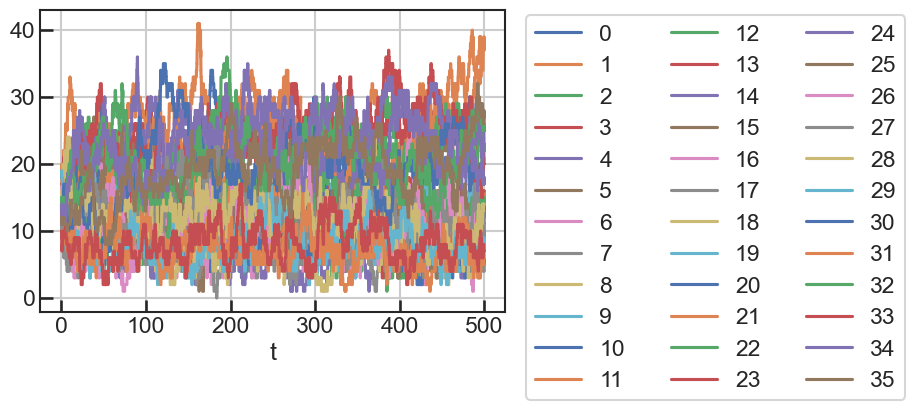

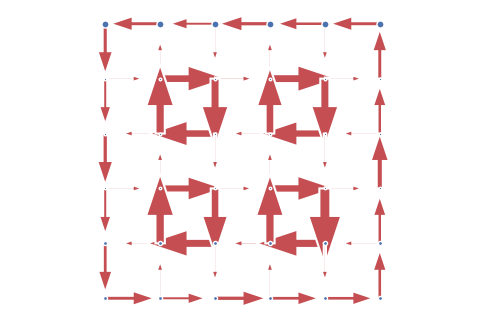

In [12]:
#Make plot of concentrations
labels = np.arange(n_x)    
labels = list(map(str,labels))

# plt.rcParams['image.cmap'] = 'guppy'
for j in np.arange(n_x):
    plt.plot(t_array, x_array[:,j], label=labels[j])

plt.legend(bbox_to_anchor=(1.02, 1.02), ncol=3)
plt.xlabel('t')


plt.grid()

plt.show()


S=make_stochiomentric_matrix_2D(n,m)
n_x=4*n*m
#The number of vertical fluxes is 
n_fv=2*m*(2*n-1)
#The number of horizontal fluxes is
n_fh=2*n*(2*m-1)
x_avg=np.mean(x_array, axis=0)
nu=find_fluxes_2d(x_avg, mu_dict, n, m)

plot_fluxes_concentrations(x_avg, nu, S,n, m)

### No edge Current Parameters

Here we just copy same code as above changing parameters to produce plot in other phase.

In [13]:
# Choices of chemical potential
n=3
m=3
# The number of chemical species is 
n_x=4*n*m
#The number of vertical fluxes is 
n_fv=2*m*(2*n-1)
#The number of horizontal fluxes is
n_fh=2*n*(2*m-1)


mu_1=-1*np.log(3)
mu_2=1*np.log(3)


mu_array = [mu_1, mu_1, mu_1, mu_1,mu_2, mu_2,mu_2,mu_2]
mu_dict=find_chemical_potentials(n,m,mu_array)
S=make_stochiomentric_matrix_2D(n,m)



#rescale time in terms of k_- which are taken to be same
k_minus=0.01*np.ones(n_fv+n_fh)
kinetic_constants=np.concatenate((k_minus *np.exp(-1*np.array(list(mu_dict.values()))), k_minus))
#creat shift for each reaction
shift_matrix=np.concatenate((1.0*S, -1.0*S), axis=1)
#index for concentrations


index_for_rates=[]
for j in range(shift_matrix.shape[1]):
    index_for_rates.append(np.where(shift_matrix[:,j]==-1)[0][0])

#initialize concentrations
x0=np.random.randint(10,20,n_x)
#x0=np.zeros(n_x)
#n_x/2
#x0[0]=1000
#initialize time
t=0
t_max=500
#Initialize array of trajectories and inital x
t_array=[0]
x_array=x0
x=x0


while t<t_max:
    #caclulate rates
    rates=kinetic_constants*x[
        index_for_rates]
    #print(rates)
    #calculate total rate at which something happens
    R=np.sum(rates)
    #calculate time until next event by drawing random number
    u1 = np.random.random()
    tau = 1/R * np.log(1/u1)

    #calculate probability of each flux and then which reaction
    prob=rates/R
    
    
    rxn=np.where(np.cumsum(prob)>np.random.uniform())[0][0]
    
    x=x+shift_matrix[:,rxn]
    t=t+tau
    #print(t)
    x_array=np.vstack((x_array, x))
    t_array.append(t)

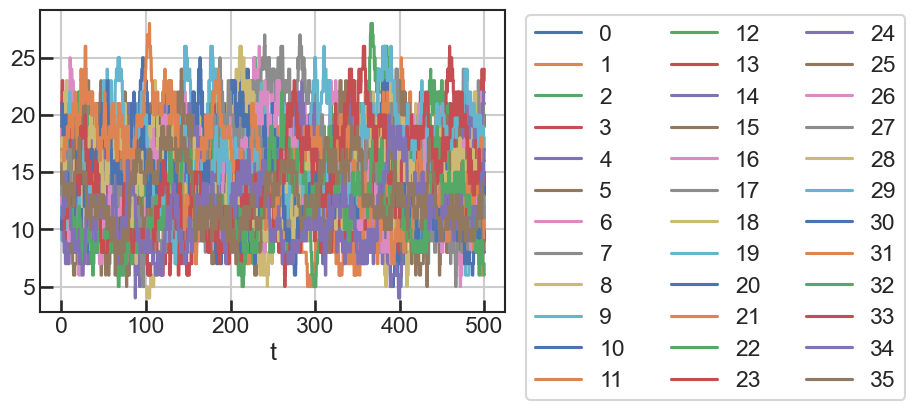

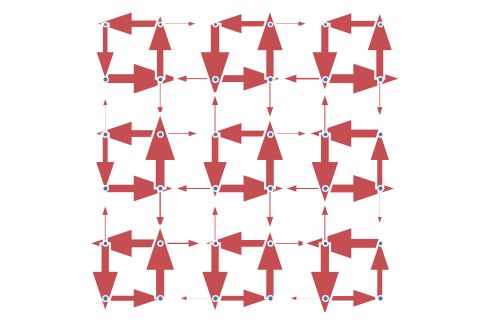

In [14]:
#Make plot of concentrations
labels = np.arange(n_x)    
labels = list(map(str,labels))

# plt.rcParams['image.cmap'] = 'guppy'
for j in np.arange(n_x):
    plt.plot(t_array, x_array[:,j], label=labels[j])

plt.legend(bbox_to_anchor=(1.02, 1.02), ncol=3)
plt.xlabel('t')


plt.grid()

plt.show()


S=make_stochiomentric_matrix_2D(n,m)
n_x=4*n*m
#The number of vertical fluxes is 
n_fv=2*m*(2*n-1)
#The number of horizontal fluxes is
n_fh=2*n*(2*m-1)
x_avg=np.mean(x_array, axis=0)
nu=find_fluxes_2d(x_avg, mu_dict, n, m)

plot_fluxes_concentrations(x_avg, nu, S,n, m)

# Spectrum and Topology Plot for SI

In this section, we revisit the spectrum and topology plot for triangular lattice and make one big figure containing these plots.

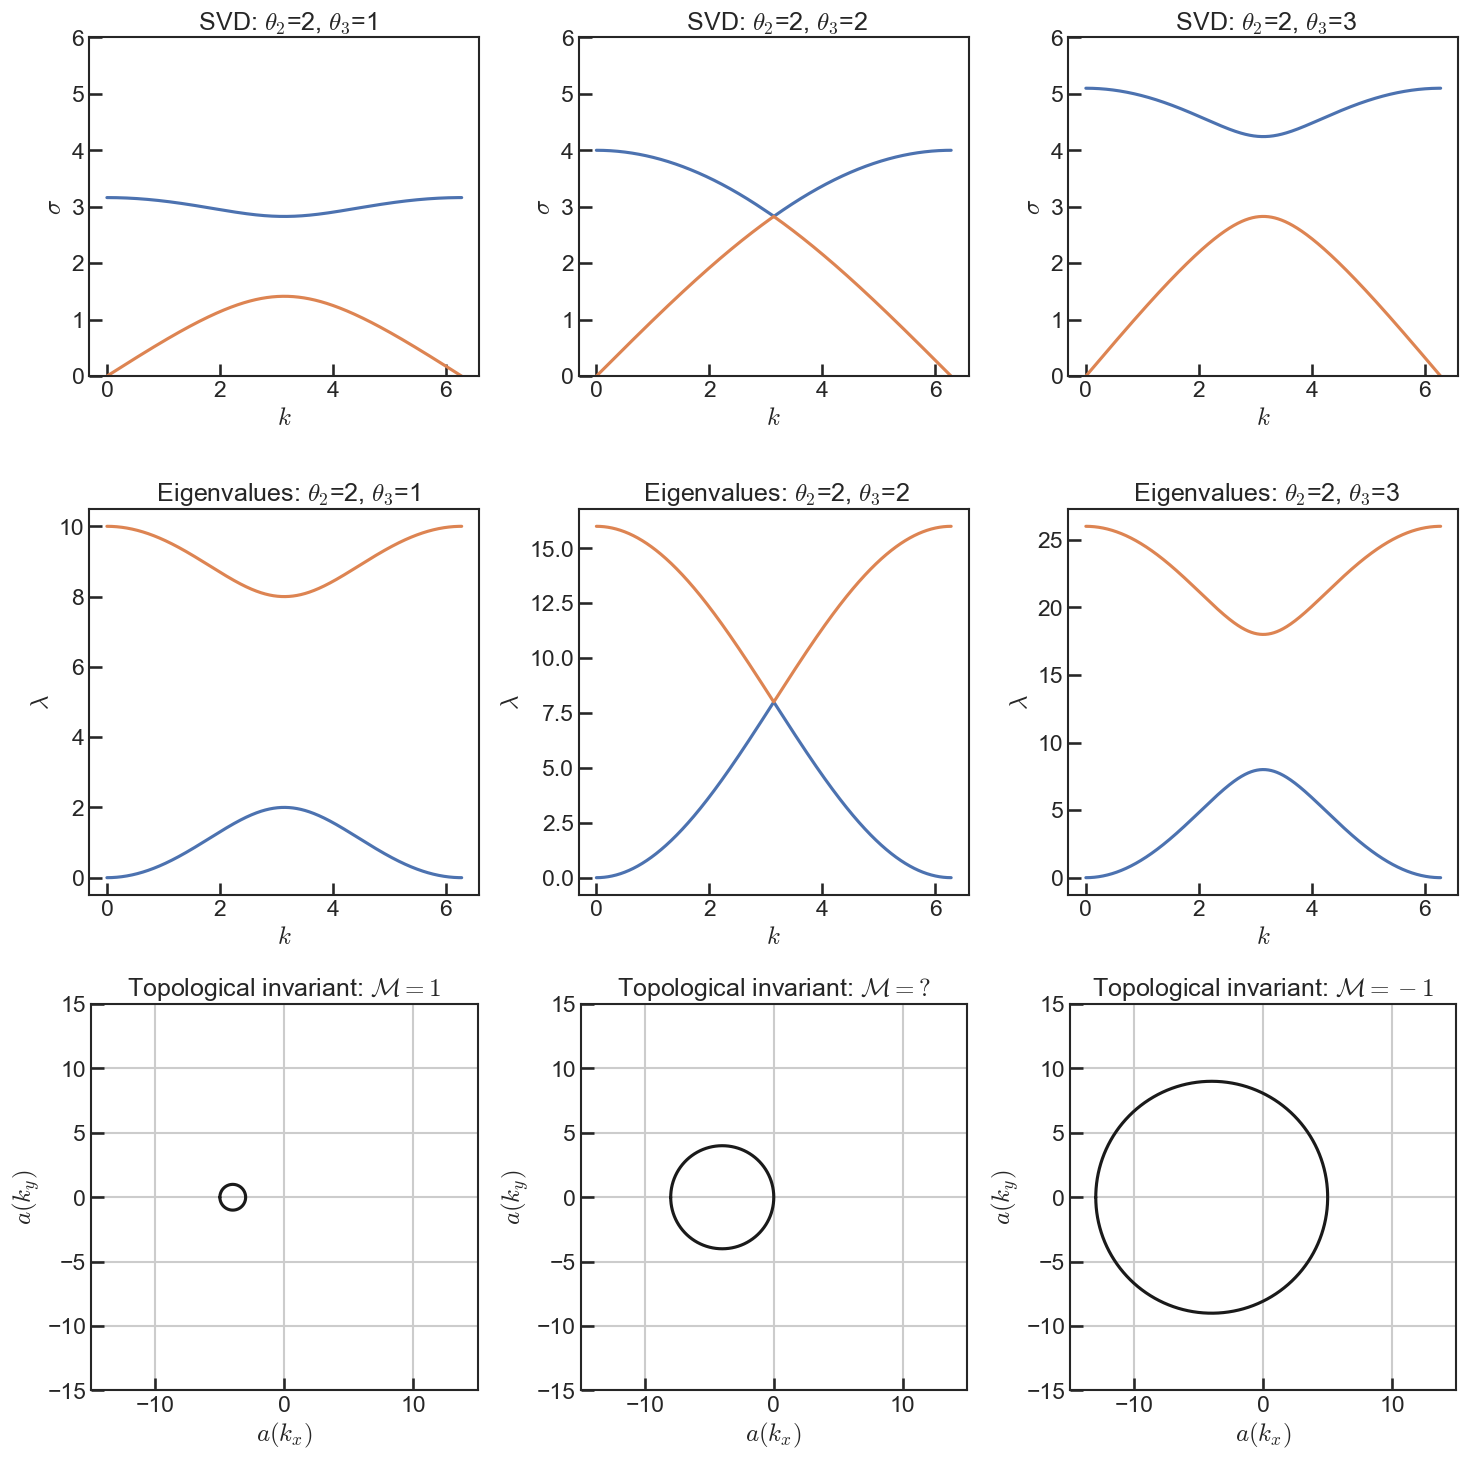

In [214]:
def get_spectrum(theta_1, theta_2, theta_3):
    k_array=np.linspace(0, 2*np.pi, 1000, endpoint=True)
    lam_array=[]
    eig_array=[]
    for k in k_array:
        S=np.array([[theta_1*(1-np.exp(1j*k)), -1*theta_2, theta_3*np.exp(1j*k)],[0, theta_2, -1*theta_3]])
        u, lam, vh = np.linalg.svd(S)
        lam_array=np.append(lam_array, lam)

        H=S.dot(np.matrix.getH(S))
        v,w = LA.eig(H)
        eig_array=np.append(eig_array, np.sort(np.real(v)))

    
    lam_1= lam_array[0::2]
    lam_2= lam_array[1::2]
    eig_1= eig_array[0::2]
    eig_2= eig_array[1::2]
    
    return [eig_1, eig_2, lam_1, lam_2]




theta_1=0
theta_2=2
theta_3=1

fig, axs = plt.subplots(3, 3, figsize=(15,15))


[eig_1, eig_2, lam_1, lam_2]=get_spectrum(theta_1, theta_2, theta_3)




axs[0,0].plot(k_array, lam_1)
axs[0,0].plot(k_array, lam_2)
axs[0,0].set_xlabel('$k$')
axs[0,0].set_ylabel('$\sigma$')
title=r'$\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0, 0].set_aspect('equal', 'box')
axs[0,0].set_ylim([0, 6])
title=r' SVD: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0,0].set_title(title)

axs[1,0].plot(k_array, eig_1)
axs[1,0].plot(k_array, eig_2)
axs[1,0].set_xlabel('$k$')
axs[1,0].set_ylabel('$\lambda$')
title=r' Eigenvalues: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[1,0].set_title(title)



k_array=np.linspace(0, 2*np.pi, 1000, endpoint=True)
a_x=-theta_2**2-theta_3**2*np.cos(k_array)
a_y=-theta_3**2*np.sin(k_array)
axs[2,0].plot(a_x,a_y, 'k')
axs[2,0].set_xlabel('$a(k_x)$')
axs[2,0].set_ylabel('$a(k_y)$')
axs[2, 0].set_aspect('equal', 'box')
axs[2,0].set_title(r'Topological invariant: $\mathcal{M}=1$')
axs[2,0].grid(True, which='both')
axs[2,0].set_ylim([-15, 15])
axs[2,0].set_xlim([-15, 15])




theta_1=0
theta_2=2
theta_3=2

[eig_1, eig_2, lam_1, lam_2]=get_spectrum(theta_1, theta_2, theta_3)




axs[0,1].plot(k_array, lam_1)
axs[0,1].plot(k_array, lam_2)
axs[0,1].set_xlabel('$k$')
axs[0,1].set_ylabel('$\sigma$')
title=r'$\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0, 1].set_aspect('equal', 'box')
axs[0,1].set_ylim([0, 6])
title=r' SVD: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0,1].set_title(title)


axs[1,1].plot(k_array, eig_1)
axs[1,1].plot(k_array, eig_2)
axs[1,1].set_xlabel('$k$')
axs[1,1].set_ylabel('$\lambda$')
title=r' Eigenvalues: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[1,1].set_title(title)

k_array=np.linspace(0, 2*np.pi, 1000, endpoint=True)
a_x=-theta_2**2-theta_3**2*np.cos(k_array)
a_y=-theta_3**2*np.sin(k_array)
axs[2,1].plot(a_x,a_y, 'k')
axs[2,1].set_xlabel('$a(k_x)$')
axs[2,1].set_ylabel('$a(k_y)$')
axs[2, 1].set_aspect('equal', 'box')
axs[2,1].set_title(r'Topological invariant: $\mathcal{M}=?$')
axs[2,1].grid(True, which='both')
axs[2,1].set_ylim([-15, 15])
axs[2,1].set_xlim([-15, 15])





theta_1=0
theta_2=2
theta_3=3

[eig_1, eig_2, lam_1, lam_2]=get_spectrum(theta_1, theta_2, theta_3)




axs[0,2].plot(k_array, lam_1)
axs[0,2].plot(k_array, lam_2)
axs[0,2].set_xlabel('$k$')
axs[0,2].set_ylabel('$\sigma$')
title=r'$\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0, 2].set_aspect('equal', 'box')
axs[0,2].set_ylim([0, 6])
title=r' SVD: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[0,2].set_title(title)


axs[1,2].plot(k_array, eig_1)
axs[1,2].plot(k_array, eig_2)
axs[1,2].set_xlabel('$k$')
axs[1,2].set_ylabel('$\lambda$')
title=r' Eigenvalues: $\theta_2$='+str(theta_2)+r', $\theta_3$='+str(theta_3)
axs[1,2].set_title(title)

k_array=np.linspace(0, 2*np.pi, 1000, endpoint=True)
a_x=-theta_2**2-theta_3**2*np.cos(k_array)
a_y=-theta_3**2*np.sin(k_array)
axs[2,2].plot(a_x,a_y, 'k')
axs[2,2].set_xlabel('$a(k_x)$')
axs[2,2].set_ylabel('$a(k_y)$')
axs[2, 2].set_aspect('equal', 'box')
axs[2,2].set_title(r'Topological invariant: $\mathcal{M}=-1$')
axs[2,2].grid(True, which='both')
axs[2,2].set_ylim([-15, 15])
axs[2,2].set_xlim([-15, 15])


plt.tight_layout()
plt.savefig('SI-triangle-analytics.pdf')